# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [2]:
df_cyber = pd.read_csv("Datasets/cybertroll_dataset.csv")
df_IEEE = pd.read_csv("Datasets/CyberBullyingTypesDataset.csv")

### 3.  Check first 10 lines

In [3]:
df_cyber.head(10)

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
5,Ill save you the trouble sister. Here comes a...,1
6,Im dead serious.Real athletes never cheat don...,1
7,...go absolutely insane.hate to be the bearer...,1
8,Lmao im watching the same thing ahaha. The g...,1
9,LOL no he said What do you call a jail cell...,1


In [4]:
df_IEEE.head(10)

,Tweet,Class
0,Post-Cuomo push to toughen NY sexual harassmen...,Sexual Harassment
1,Push to toughen NY sexual harassment laws that...,Sexual Harassment
2,@GabbieHanna As if Trisha didn’t accuse him of...,Sexual Harassment
3,@fentsemadii True is that 🔥 thou I know nothin...,Sexual Harassment
4,Watch the recap video of the two-day hands-on ...,Sexual Harassment
5,I think this is sexual harassment. The duck i...,Sexual Harassment
6,cases of sexual harassment and abuse can never...,Sexual Harassment
7,Sexual harassment policies don’t exist in most...,Sexual Harassment
8,@TheLeadCNN Biden's Afghanistan speech yesterd...,Sexual Harassment
9,Chris Cuomo Breaks Silence About Andrew Cuomo’...,Sexual Harassment


### 4. Check Datasets type values and sum & drop duplicates

In [5]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     20001 non-null  object
 1   annotation  20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [6]:
df_IEEE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2140 non-null   object
 1   Class   2140 non-null   object
dtypes: object(2)
memory usage: 33.6+ KB


In [7]:
df_cyber.shape

(20001, 2)

In [8]:
df_IEEE.shape

(2140, 2)

[Text(0.5, 1.0, 'Graph of Dataset')]

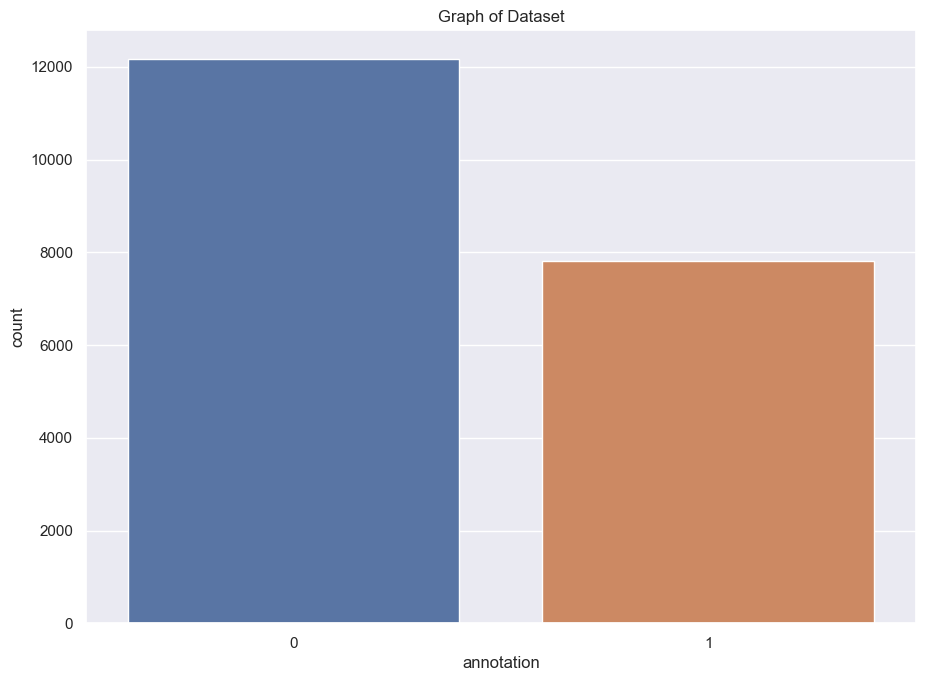

In [9]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='annotation',data=df_cyber).set(title="Graph of Dataset")

[Text(0.5, 1.0, 'Graph of Dataset')]

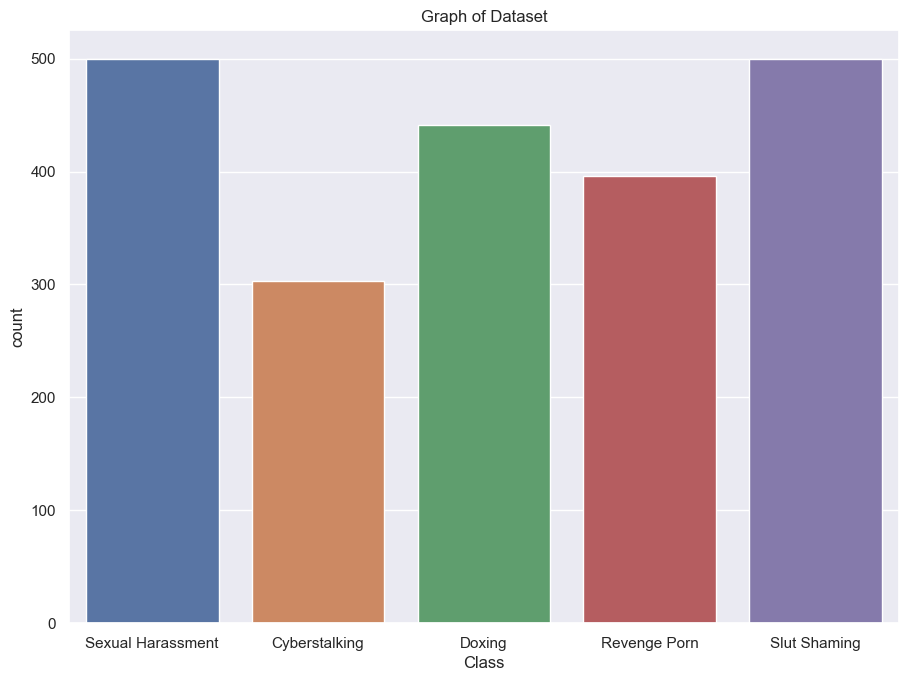

In [10]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='Class',data=df_IEEE).set(title="Graph of Dataset")

In [11]:
df_IEEE["Class"] = df_IEEE["Class"].replace({"Sexual Harassment": 1})
df_IEEE["Class"] = df_IEEE["Class"].replace({"Cyberstalking": 1})
df_IEEE["Class"] = df_IEEE["Class"].replace({"Doxing": 1})
df_IEEE["Class"] = df_IEEE["Class"].replace({"Revenge Porn": 1})
df_IEEE["Class"] = df_IEEE["Class"].replace({"Slut Shaming": 1})

In [12]:
df_IEEE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2140 non-null   object
 1   Class   2140 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.6+ KB


In [13]:
df_IEEE = df_IEEE.rename(columns=({'Tweet':'content'}))
df_IEEE = df_IEEE.rename(columns=({'Class':'annotation'}))

In [14]:
df_IEEE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     2140 non-null   object
 1   annotation  2140 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.6+ KB


In [15]:
df_cyber.isnull().sum()

content       0
annotation    0
dtype: int64

In [16]:
df_IEEE.isnull().sum()

content       0
annotation    0
dtype: int64

In [17]:
df_cyber.content.duplicated().sum()

5373

In [18]:
df_IEEE.content.duplicated().sum()

38

In [19]:
df_cyber.duplicated(subset='content').sum()

5373

In [20]:
df_IEEE.duplicated(subset='content').sum()

38

In [21]:
df_cyber.duplicated(subset=['content','annotation']).sum()

5359

In [22]:
df_IEEE.duplicated(subset=['content','annotation']).sum()

38

In [23]:
df_cyber['annotation'].value_counts()

0    12179
1     7822
Name: annotation, dtype: int64

In [24]:
df_IEEE['annotation'].value_counts()

1    2140
Name: annotation, dtype: int64

In [25]:
#Adding the datasets
df_cyber = pd.concat([df_cyber, df_IEEE], axis=0)
df_cyber.head(10)
df_cyber.to_csv("ExportedDatasetsNew/CyberTrollIEEE.csv", index=False)

In [26]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22141 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     22141 non-null  object
 1   annotation  22141 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 518.9+ KB


In [31]:
df_cyber['annotation'].value_counts()

0    12179
1     9962
Name: annotation, dtype: int64

In [165]:
# # Shuffling
# df_cyber = df_cyber.sample(frac=1)
# df_cyber.reset_index(inplace=True)
# df_cyber.drop(["index"], axis=1, inplace=True)

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

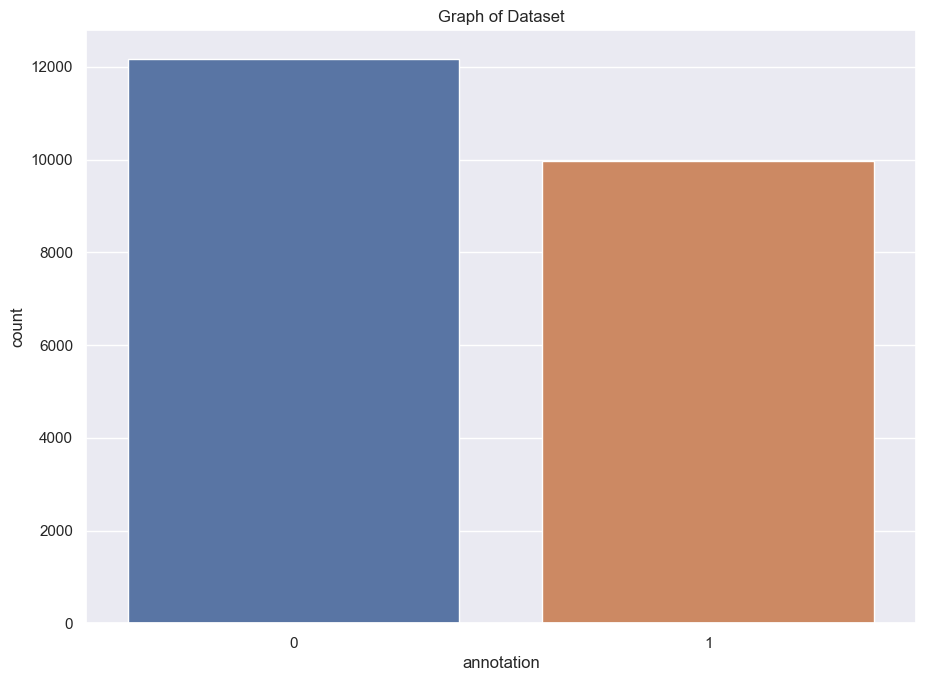

In [32]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='annotation',data=df_cyber).set(title="Graph of Dataset")

### 6.  WordCloud of Dataset

In [33]:
def clean_tweets(tweet):
    # remove URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove usernames
    tweet = re.sub(r'@[^\s]+[\s]?','',tweet)
    # Remove hashtags
    tweet = re.sub(r'#[^\s]+[\s]?','',tweet)
    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    # remove RT
    tweet = re.sub('RT' , '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [34]:
df_cyber["content"] = df_cyber["content"].apply(clean_tweets)
df_cyber.head(30)

,content,annotation
0,Get fucking real dude,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up I could do it all day ...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men No men thats no...,1
5,Ill save you the trouble sister Here comes a ...,1
6,Im dead seriousReal athletes never cheat dont...,1
7,go absolutely insanehate to be the bearer of ...,1
8,Lmao im watching the same thing ahaha The ga...,1
9,LOL no he said What do you call a jail cell...,1


In [35]:
df_cyber.isnull().sum()

content       0
annotation    0
dtype: int64

### 7. Stopwords

In [36]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [38]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                          for token in str(sentence).split()
                                          if token not in stopwords.words('english')))

    return preprocessed_text

In [39]:
preprocessed_review = preprocess_text(df_cyber['content'].values)
df_cyber['content']= preprocessed_review

100%|██████████| 22141/22141 [01:19<00:00, 279.13it/s]


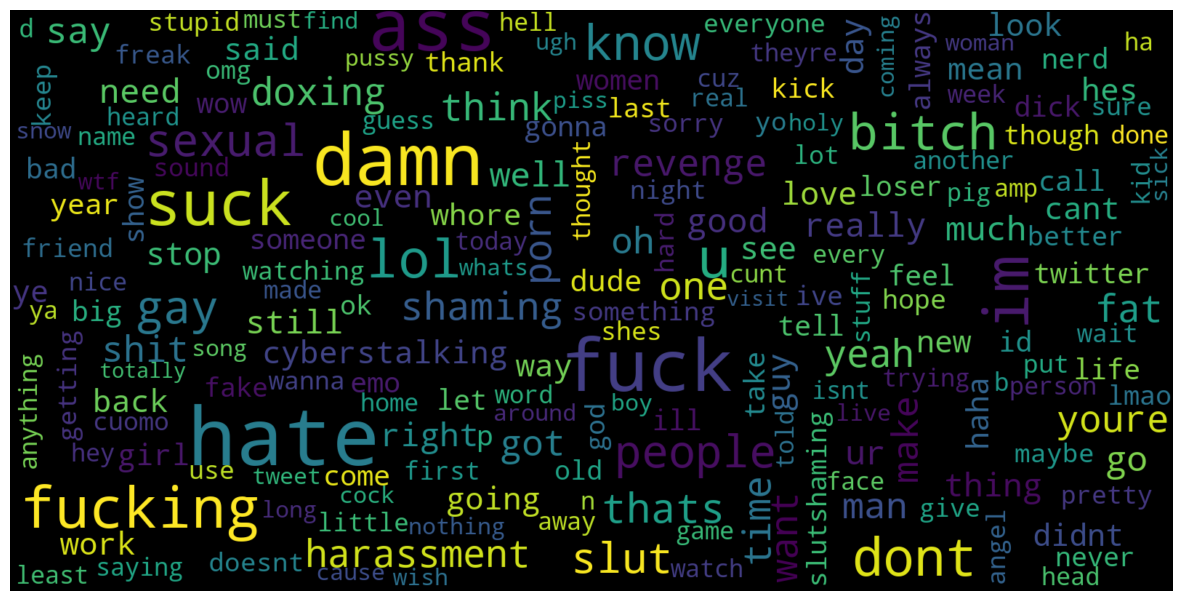

In [40]:
# Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['content'][df_cyber['annotation'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

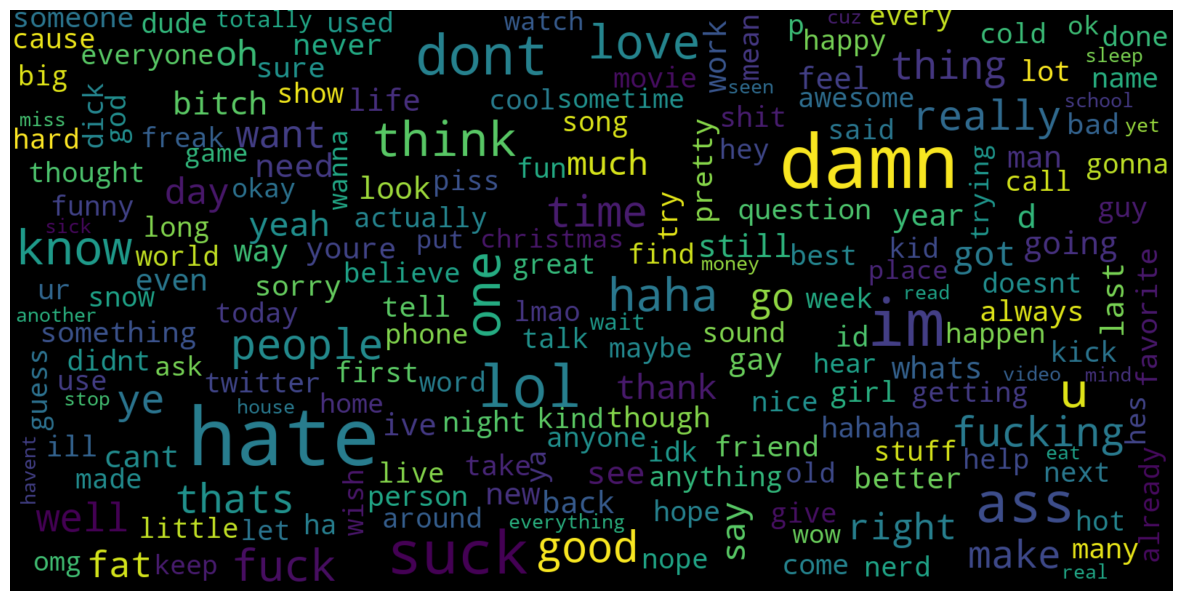

In [41]:
# Not Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['content'][df_cyber['annotation'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

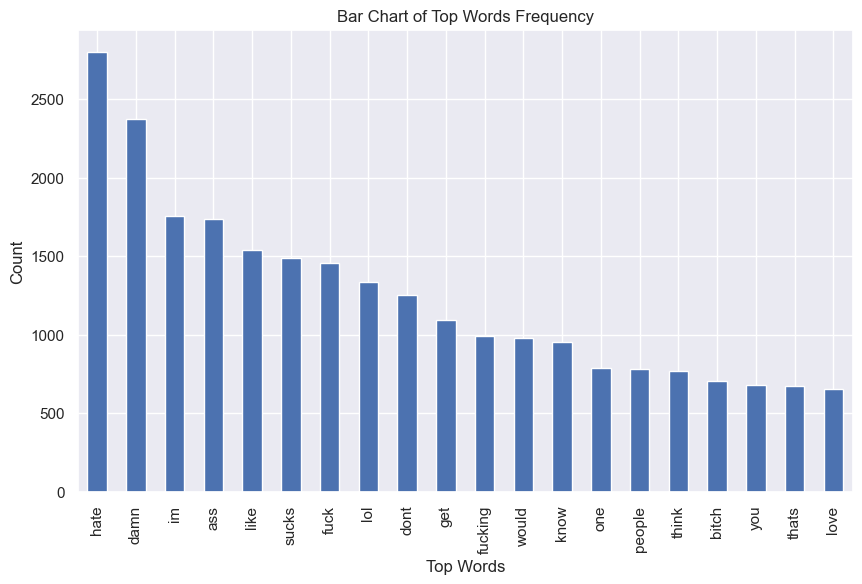

In [42]:

from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_cyber['content'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### 11. Train/Test Splitting

In [43]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df_cyber['content'],
                                                    df_cyber['annotation'],
                                                    test_size=0.2,
                                                    random_state=1)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [44]:
x_train.shape

(17712,)

In [45]:
x_test.shape

(4429,)

In [46]:
y_train.shape

(17712,)

In [47]:
y_test.shape

(4429,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [49]:
print(x_train)

  (0, 6686)	0.43451564614555144
  (0, 11463)	0.3276558482366426
  (0, 16016)	0.6790550618712546
  (0, 11746)	0.4926682670094217
  (1, 14087)	0.32697369423780276
  (1, 14782)	0.1937364622863471
  (1, 10427)	0.17850954473812247
  (1, 6998)	0.32697369423780276
  (1, 11756)	0.29875321440557334
  (1, 4281)	0.3192082688489986
  (1, 5054)	0.2086115710917796
  (1, 14360)	0.2605213600291826
  (1, 8892)	0.214610112776433
  (1, 2591)	0.32697369423780276
  (1, 4370)	0.13690542498299388
  (1, 4282)	0.32697369423780276
  (1, 1792)	0.25460885085697454
  (1, 5937)	0.13097560317247042
  (1, 11746)	0.2315920953384044
  (2, 5489)	0.5182234645126832
  (2, 15370)	0.3277939255123282
  (2, 2320)	0.3118024473427544
  (2, 17608)	0.2773042555765263
  (2, 14952)	0.22316888927326017
  (2, 4707)	0.5537052222623318
  :	:
  (17706, 9185)	0.3153433728584886
  (17706, 841)	0.29137328929922585
  (17707, 10392)	0.5696342701124277
  (17707, 13490)	0.6057106776756923
  (17707, 15565)	0.3695340973713328
  (17707, 13298)	0.

In [50]:
print(x_test)

  (0, 16813)	0.5493967425482325
  (0, 6898)	0.3559095916794641
  (0, 1357)	0.7559706223312838
  (1, 17313)	0.2595220898953065
  (1, 16899)	0.29927075280561655
  (1, 14652)	0.3496626084572221
  (1, 14037)	0.3615415535126154
  (1, 10591)	0.2678755315442327
  (1, 10500)	0.2620777694244316
  (1, 6898)	0.15204143693470284
  (1, 6679)	0.22603665578576448
  (1, 1739)	0.39053930683573806
  (1, 1245)	0.4721619325907132
  (2, 16813)	0.16612234614545718
  (2, 16027)	0.261026898390449
  (2, 14749)	0.172397135026185
  (2, 14281)	0.38502871759539364
  (2, 13782)	0.223573915250698
  (2, 11723)	0.26872822009438596
  (2, 11009)	0.3049605820204105
  (2, 9185)	0.1330635330167097
  (2, 8769)	0.286358272318914
  (2, 6320)	0.1636530494713873
  (2, 5492)	0.26243578209130103
  (2, 4315)	0.1967457153326352
  :	:
  (4423, 14338)	0.3991440387418315
  (4423, 12847)	0.5795674198688741
  (4423, 10927)	0.4283988039180877
  (4423, 10437)	0.49753745167368946
  (4424, 17497)	0.2344363400130241
  (4424, 17465)	0.2896008

### Logistic Regression (LR)

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8752822944896116
0.7812147211560172


In [52]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2481
           1       0.75      0.76      0.75      1948

    accuracy                           0.78      4429
   macro avg       0.78      0.78      0.78      4429
weighted avg       0.78      0.78      0.78      4429



### Desicion Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9933943089430894
0.8545947166403252


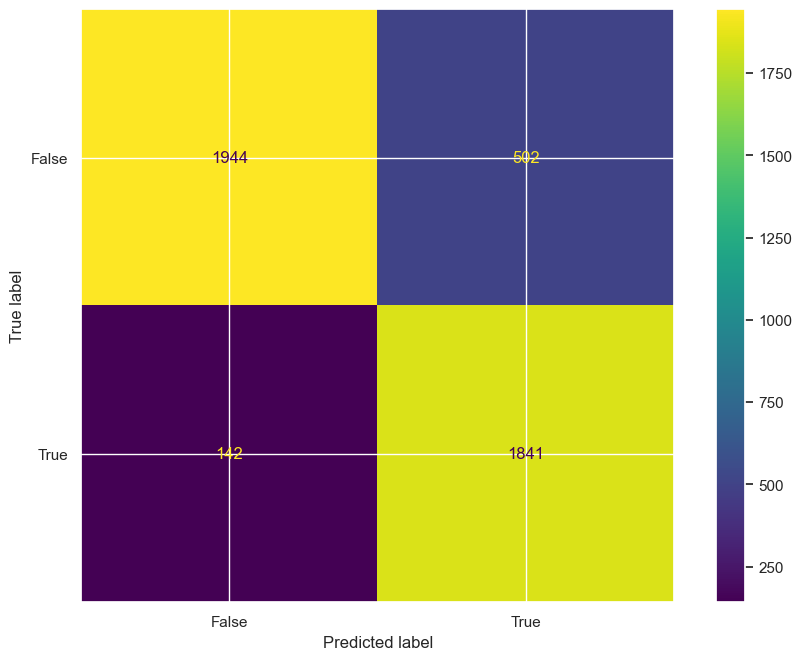

In [54]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [55]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      2086
           1       0.93      0.79      0.85      2343

    accuracy                           0.85      4429
   macro avg       0.86      0.86      0.85      4429
weighted avg       0.87      0.85      0.85      4429



### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
model = RandomForestClassifier(n_estimators=30, max_depth=900)
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9929426377597109
0.9029126213592233


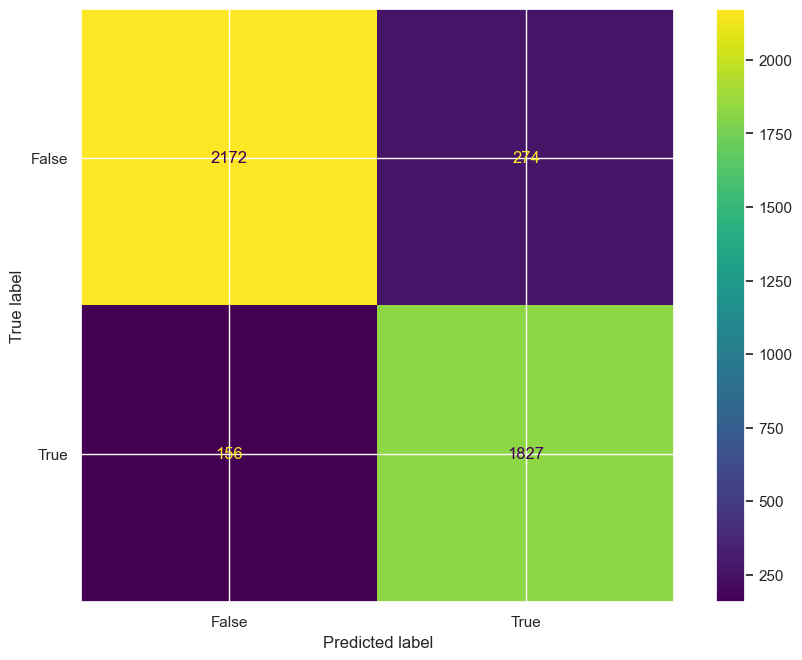

In [95]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [96]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2328
           1       0.92      0.87      0.89      2101

    accuracy                           0.90      4429
   macro avg       0.90      0.90      0.90      4429
weighted avg       0.90      0.90      0.90      4429



### XGBoost

In [97]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)

C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [98]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8268970189701897
0.7552494919846466


In [99]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      2634
           1       0.68      0.75      0.71      1795

    accuracy                           0.76      4429
   macro avg       0.75      0.75      0.75      4429
weighted avg       0.76      0.76      0.76      4429



### Multinomial Naive Bayes

In [100]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8928410117434508
0.7995032738767216


In [101]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2580
           1       0.74      0.80      0.77      1849

    accuracy                           0.80      4429
   macro avg       0.79      0.80      0.80      4429
weighted avg       0.80      0.80      0.80      4429



### Support Vector Machine

In [102]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9175700090334237
0.8060510273199368


In [103]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2303
           1       0.82      0.76      0.79      2126

    accuracy                           0.81      4429
   macro avg       0.81      0.80      0.81      4429
weighted avg       0.81      0.81      0.81      4429



### K-Nearest Neighbours

In [104]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8778229448961157
0.6762248814630842


In [105]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76      3654
           1       0.33      0.85      0.48       775

    accuracy                           0.68      4429
   macro avg       0.64      0.75      0.62      4429
weighted avg       0.85      0.68      0.72      4429



### Bagging Decision Tree (Ensemble Learning I)

In [106]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.7,max_features=1.0,n_estimators=30)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9788279132791328
0.8484985324000903


In [107]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2105
           1       0.92      0.78      0.84      2324

    accuracy                           0.85      4429
   macro avg       0.85      0.85      0.85      4429
weighted avg       0.86      0.85      0.85      4429



### Boosting Decision Tree (Ensemble Learning II)

In [133]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=30),n_estimators=100,learning_rate=0.8)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9933943089430894
0.9006547753443215


In [134]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2318
           1       0.92      0.87      0.89      2111

    accuracy                           0.90      4429
   macro avg       0.90      0.90      0.90      4429
weighted avg       0.90      0.90      0.90      4429

